In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dfh = pd.read_csv('Housing.csv')
dfa = pd.read_csv('advertising.csv')

In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dfh[binary_cols] = dfh[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

dfh = pd.get_dummies(dfh, columns=['furnishingstatus'], drop_first=True)


In [ ]:
print(dfa.describe())
print(dfa.info())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [ ]:
dfa_scaled = dfa.copy()

for col in ['TV', 'Radio', 'Newspaper']:
    mean = dfa[col].mean()
    std = dfa[col].std()
    dfa_scaled[col] = (dfa[col] - mean) / std

dfa_scaled


,TV,Radio,Newspaper,Sales
0,0.976223,0.987019,1.928110,0.807087
1,-1.195980,1.087947,0.749413,0.346457
2,-1.515490,1.532029,1.933001,0.409449
3,0.056314,1.222518,1.404788,0.586614
4,0.399231,-0.829681,1.399897,0.641732
...,...,...,...,...
195,-1.269713,-1.307406,-0.781426,0.236220
196,-0.614307,-1.226663,-1.060205,0.488189
197,0.354757,-0.930609,-1.143350,0.519685
198,1.602370,1.269617,1.781384,0.940945


In [ ]:
num_cols2 = ['TV', 'Radio', 'Newspaper','Sales']

dfa[num_cols2] = (dfa[num_cols2] - dfa[num_cols2].min()) / (dfa[num_cols2].max() - dfa[num_cols2].min())

dfa[num_cols2]

,TV,Radio,Newspaper,Sales
0,0.783202,0.762097,0.773288,0.807087
1,0.149539,0.792339,0.502806,0.346457
2,0.056333,0.925403,0.774411,0.409449
3,0.514851,0.832661,0.653199,0.586614
4,0.614886,0.217742,0.652076,0.641732
...,...,...,...,...
195,0.128030,0.074597,0.151515,0.236220
196,0.319222,0.098790,0.087542,0.488189
197,0.601912,0.187500,0.068462,0.519685
198,0.965859,0.846774,0.739618,0.940945


In [ ]:
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

dfh[num_cols] = (dfh[num_cols] - dfh[num_cols].min()) / (dfh[num_cols].max() - dfh[num_cols].min())


In [ ]:
outlier_counts = {}

for col in dfa.columns:
    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dfa[(dfa[col] < lower_bound) | (dfa[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


TV: 0 outliers
Radio: 0 outliers
Newspaper: 2 outliers
Sales: 0 outliers


In [ ]:
import pandas as pd

numeric_cols = dfh.select_dtypes(include=['int64', 'float64']).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = dfh[col].quantile(0.25)
    Q3 = dfh[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dfh[(dfh[col] < lower_bound) | (dfh[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


price: 15 outliers
area: 12 outliers
bedrooms: 12 outliers
bathrooms: 1 outliers
stories: 41 outliers
mainroad: 77 outliers
guestroom: 97 outliers
basement: 0 outliers
hotwaterheating: 25 outliers
airconditioning: 0 outliers
parking: 12 outliers
prefarea: 128 outliers


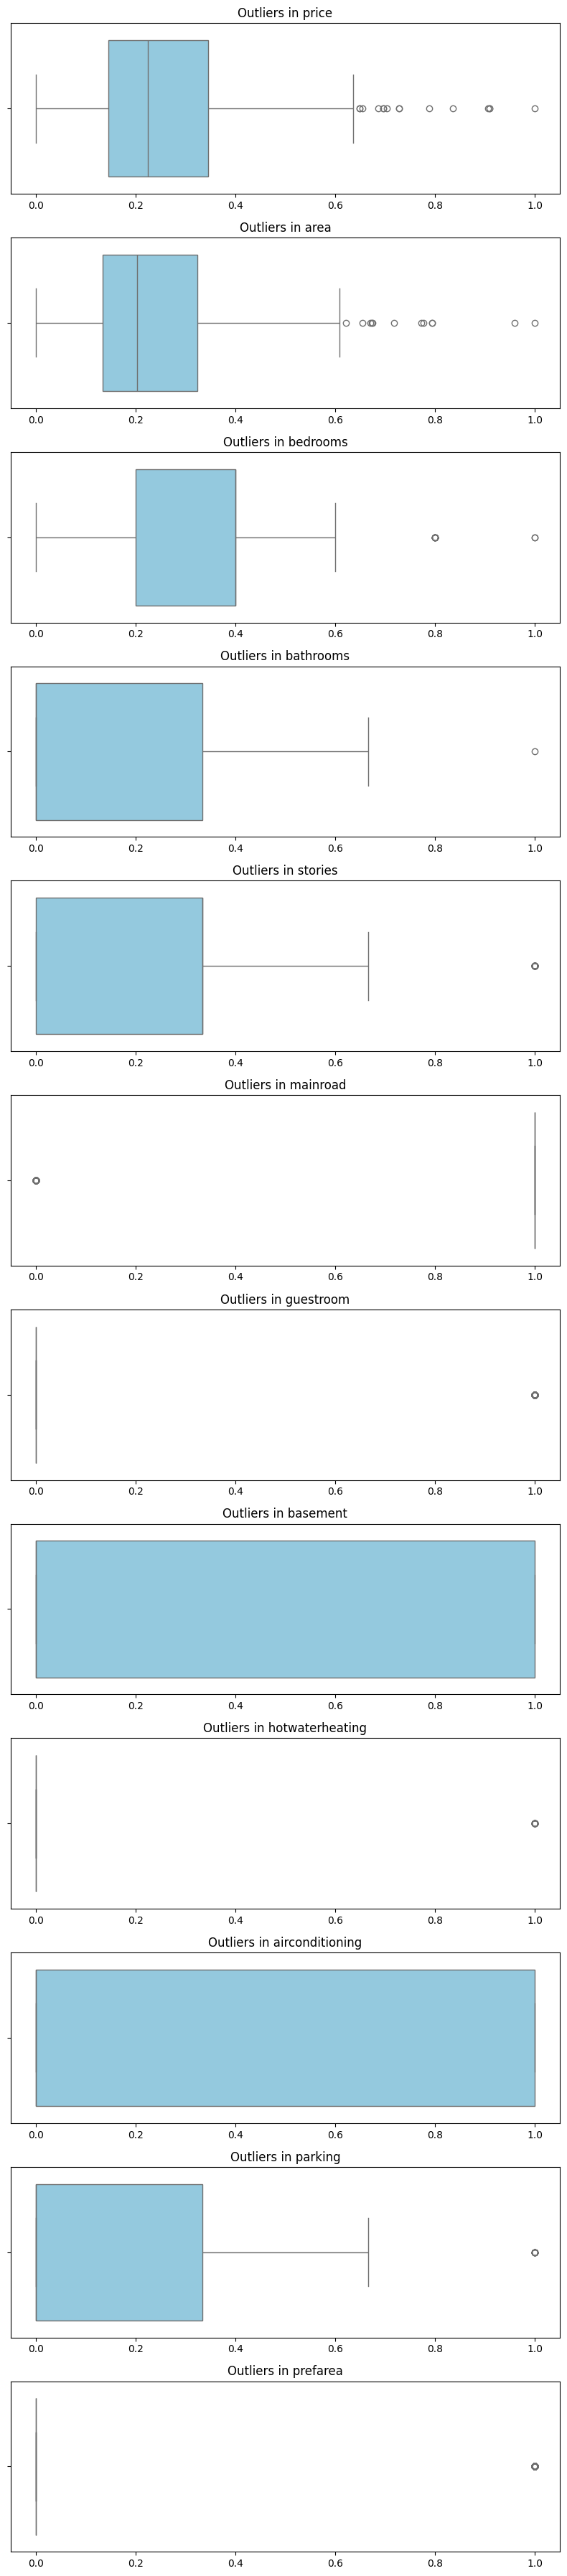

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns
numeric_cols = dfh.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
plt.figure(figsize=(8, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=dfh[col], color='skyblue')
    plt.title(f'Outliers in {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [95]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df_clean = dfh.copy()

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

important_cols = ["area", "bathrooms"]

for col in important_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

print(f"Data shape after removing outliers: {df_clean.shape}")


Data shape after removing outliers: (532, 14)


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X =  dfh[["area","bathrooms",]]
y = dfh["price"]


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Intercept: 0.10328485267578963
Slope: 0.4915190393217463
Mean Squared Error: 0.014002647609278064
R² Score: 0.46508553009562115


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

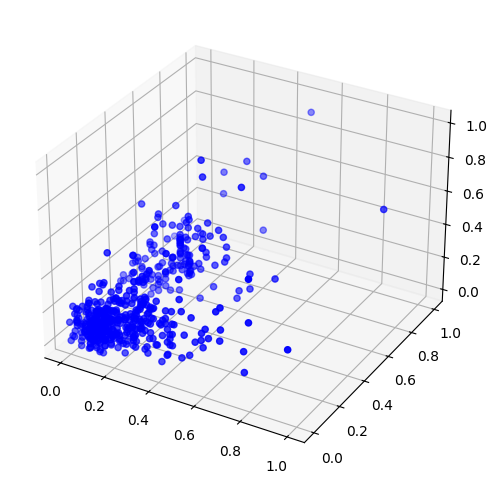

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# Scatter plot of actual data
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dfh['area'], dfh['bathrooms'], dfh['price'], color='blue', label='Actual data')

# Create grid for prediction
area_range = np.linspace(dfh['area'].min(), dfh['area'].max(), 20)
bathrooms_range = np.linspace(dfh['bathrooms'].min(), dfh['bathrooms'].max(), 20)
area_grid, bathrooms_grid = np.meshgrid(area_range, bathrooms_range)

# Train the model with both features
X = dfh[["area","bathrooms"]]
y = dfh["price"]
model = LinearRegression()
model.fit(X, y)

# Predict using the model for the grid
price_pred_grid = model.predict(
    np.c_[area_grid.ravel(), bathrooms_grid.ravel()]
).reshape(area_grid.shape)

# Plot regression plane
ax.plot_surface(area_grid, bathrooms_grid, price_pred_grid, color='red', alpha=0.5)

# Labels
ax.set_xlabel('Area')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
ax.set_title('3D Linear Regression Plane')

plt.legend()
plt.show()

<Axes: >

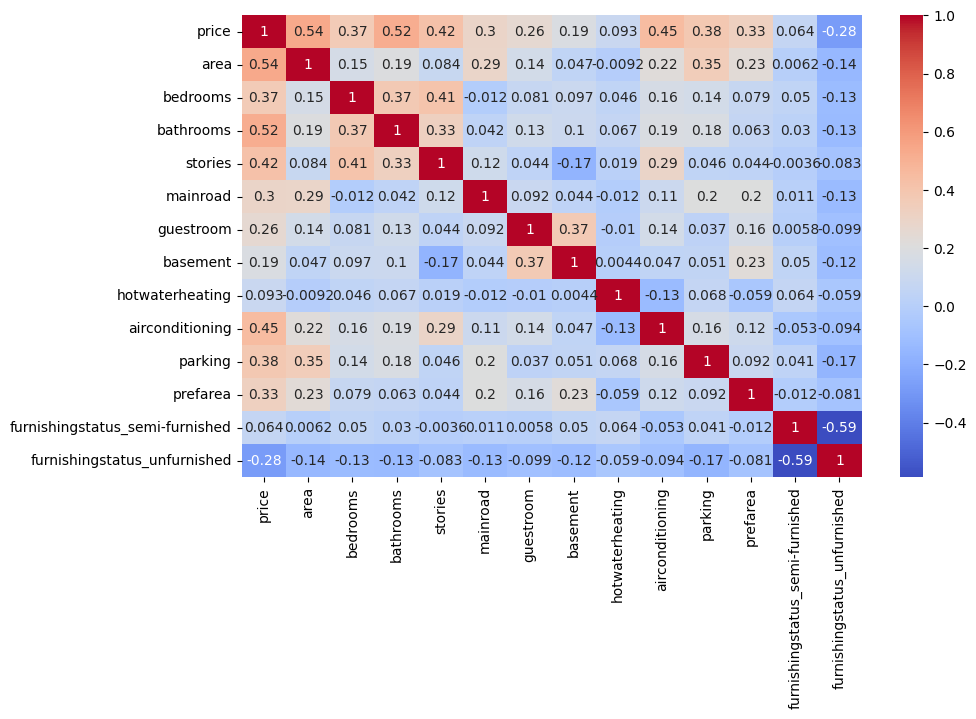

In [ ]:
corr = dfh.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")


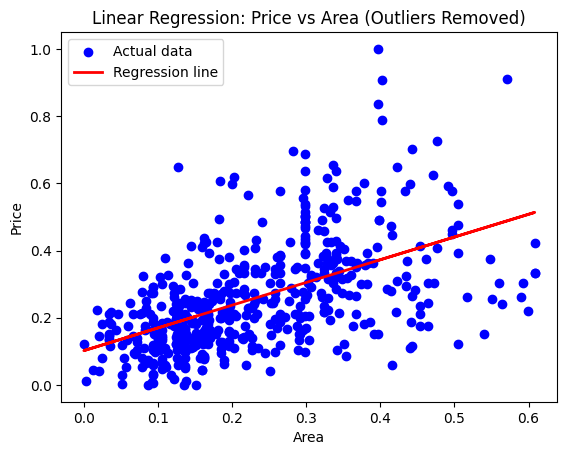

Intercept: 0.10202029213956812
Slope: 0.6764568710499187
Mean Squared Error: 0.017515760564110028
R² Score: 0.2963067760794066


In [98]:
X = df_clean[['area']]
y = df_clean['price']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Area (Outliers Removed)')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Mean Squared Error:", mse)
print("R² Score:", r2)


In [ ]:
X = dfa_scaled[['TV', 'Radio', 'Newspaper']]
y = dfa_scaled['Sales']

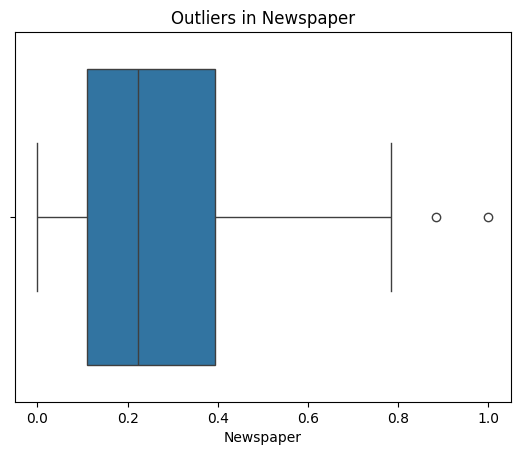

In [ ]:

sns.boxplot(x=dfa['Newspaper'])
plt.title('Outliers in Newspaper')
plt.show()


In [ ]:

Q1 = dfa["Newspaper"].quantile(0.25)
Q3 = dfa["Newspaper"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dfa = dfa[(dfa["Newspaper"] >= lower_bound) & (dfa["Newspaper"] <= upper_bound)]


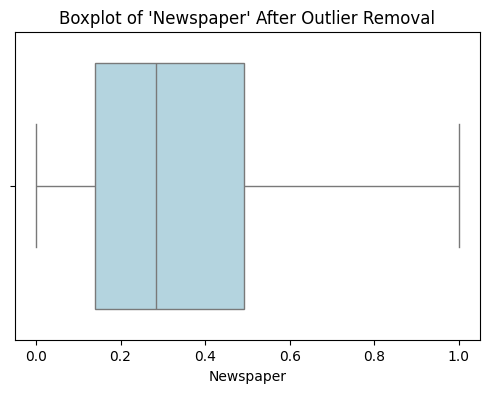

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot after outlier removal
plt.figure(figsize=(6, 4))
sns.boxplot(x=dfa["Newspaper"], color="lightblue")
plt.title("Boxplot of 'Newspaper' After Outlier Removal")
plt.xlabel("Newspaper")
plt.show()


<Axes: >

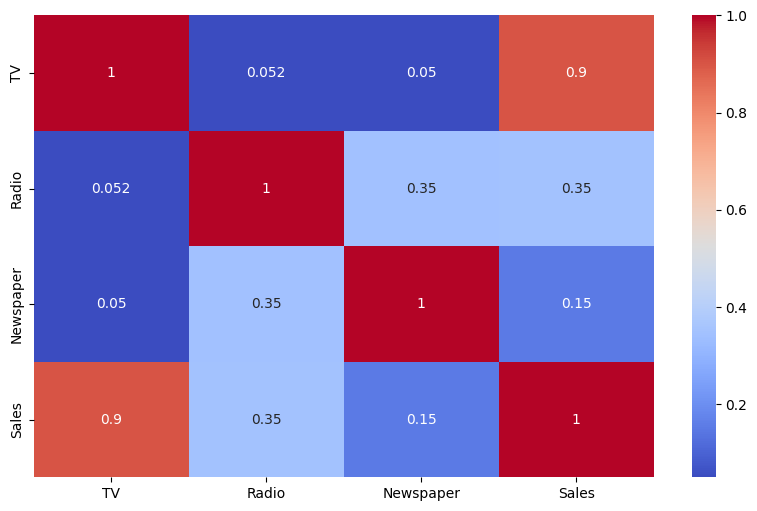

In [ ]:


corr = dfa.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")


Intercept: 0.21238243966264758
Slope: 0.6463657993706535
R² Score: 0.8099540690272746


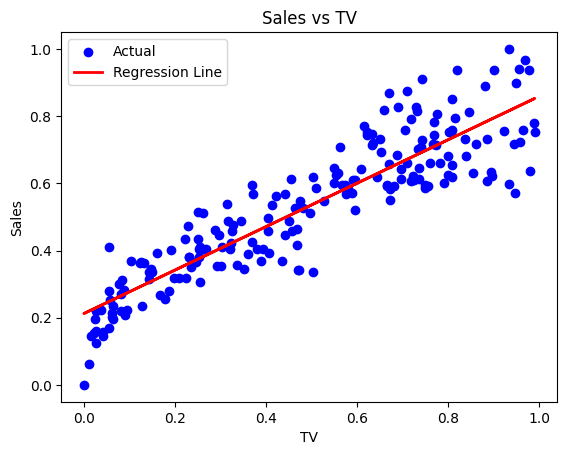

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Features and target
X = dfa[["TV"]]  # must be 2D for sklearn
y = dfa["Sales"]

# Model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R² Score:", model.score(X, y))

# Plot
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")
plt.legend()
plt.show()


# Task
Analyze the aviation incidents and accidents dataset provided in the CSV file "aviation_data.csv" by performing the following steps: load and understand the data, convert date and time columns to a single datetime object, select specific columns ('Aircraft make name', 'State name', 'Aircraft model name', 'Text information', 'Flight phase', 'Event description type', 'Fatal flag'), handle missing values in 'Fatal Flag', 'FLT_PHASE', and 'ACFT_DMG_DESC' columns, verify missing value replacement, check the initial number of observations, drop rows with missing aircraft names and columns with more than 75 non-null values, check the number of observations after dropping, group the data by aircraft name, count the occurrences of each aircraft type, display observations where 'Fatal Flag' is 'Yes', and apply one-hot encoding to the 'ACFT_DMG_DESC' column, dropping one of the resulting columns.

## Load and understand the dataset




In [ ]:
df = pd.read_csv('aviation_data.csv')
display(df.head())
df.info()
display(df.describe())

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-Feb-16,18-Feb-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-Feb-16,18-Feb-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-Feb-16,18-Feb-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-Feb-16,18-Feb-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UPDATED              83 non-null     object 
 1   ENTRY_DATE           83 non-null     object 
 2   EVENT_LCL_DATE       83 non-null     object 
 3   EVENT_LCL_TIME       83 non-null     object 
 4   LOC_CITY_NAME        83 non-null     object 
 5   LOC_STATE_NAME       83 non-null     object 
 6   LOC_CNTRY_NAME       2 non-null      object 
 7   RMK_TEXT             83 non-null     object 
 8   EVENT_TYPE_DESC      83 non-null     object 
 9   FSDO_DESC            81 non-null     object 
 10  REGIST_NBR           83 non-null     object 
 11  FLT_NBR              6 non-null      object 
 12  ACFT_OPRTR           7 non-null      object 
 13  ACFT_MAKE_NAME       78 non-null     object 
 14  ACFT_MODEL_NAME      79 non-null     object 
 15  ACFT_MISSING_FLAG    0 non-null      float

,ACFT_MISSING_FLAG,FAR_PART,FLT_CRW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CBN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
count,0.0,1.0,64.000000,6.000000,1.0,8.000000,0.0,0.0,0.0,0.0,...,17.000000,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
mean,NaN,91.0,1.218750,1.333333,3.0,1.500000,NaN,NaN,NaN,NaN,...,1.823529,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
std,NaN,NaN,0.700765,0.516398,NaN,0.534522,NaN,NaN,NaN,NaN,...,1.236694,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,91.0,1.000000,1.000000,3.0,1.000000,NaN,NaN,NaN,NaN,...,1.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
25%,NaN,91.0,1.000000,1.000000,3.0,1.000000,NaN,NaN,NaN,NaN,...,1.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
50%,NaN,91.0,1.000000,1.000000,3.0,1.500000,NaN,NaN,NaN,NaN,...,2.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
75%,NaN,91.0,1.000000,1.750000,3.0,2.000000,NaN,NaN,NaN,NaN,...,2.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
max,NaN,91.0,6.000000,2.000000,3.0,2.000000,NaN,NaN,NaN,NaN,...,6.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0


In [ ]:
import os
print(os.listdir('/content/'))

['.config', 'aviation_data.csv', 'advertising.csv', '.ipynb_checkpoints', 'Housing.csv', 'sample_data']


In [ ]:
df = pd.read_csv('aviation_data.csv')
display(df.head())
df.info()
display(df.describe())

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-Feb-16,18-Feb-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-Feb-16,18-Feb-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-Feb-16,18-Feb-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-Feb-16,18-Feb-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UPDATED              83 non-null     object 
 1   ENTRY_DATE           83 non-null     object 
 2   EVENT_LCL_DATE       83 non-null     object 
 3   EVENT_LCL_TIME       83 non-null     object 
 4   LOC_CITY_NAME        83 non-null     object 
 5   LOC_STATE_NAME       83 non-null     object 
 6   LOC_CNTRY_NAME       2 non-null      object 
 7   RMK_TEXT             83 non-null     object 
 8   EVENT_TYPE_DESC      83 non-null     object 
 9   FSDO_DESC            81 non-null     object 
 10  REGIST_NBR           83 non-null     object 
 11  FLT_NBR              6 non-null      object 
 12  ACFT_OPRTR           7 non-null      object 
 13  ACFT_MAKE_NAME       78 non-null     object 
 14  ACFT_MODEL_NAME      79 non-null     object 
 15  ACFT_MISSING_FLAG    0 non-null      float

,ACFT_MISSING_FLAG,FAR_PART,FLT_CRW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CBN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
count,0.0,1.0,64.000000,6.000000,1.0,8.000000,0.0,0.0,0.0,0.0,...,17.000000,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
mean,NaN,91.0,1.218750,1.333333,3.0,1.500000,NaN,NaN,NaN,NaN,...,1.823529,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
std,NaN,NaN,0.700765,0.516398,NaN,0.534522,NaN,NaN,NaN,NaN,...,1.236694,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,91.0,1.000000,1.000000,3.0,1.000000,NaN,NaN,NaN,NaN,...,1.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
25%,NaN,91.0,1.000000,1.000000,3.0,1.000000,NaN,NaN,NaN,NaN,...,1.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
50%,NaN,91.0,1.000000,1.000000,3.0,1.500000,NaN,NaN,NaN,NaN,...,2.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
75%,NaN,91.0,1.000000,1.750000,3.0,2.000000,NaN,NaN,NaN,NaN,...,2.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
max,NaN,91.0,6.000000,2.000000,3.0,2.000000,NaN,NaN,NaN,NaN,...,6.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0



###
Combine the date and time columns into a single datetime object.


In [ ]:
df['Event Timestamp'] = df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME']
df['Event Timestamp'] = pd.to_datetime(df['Event Timestamp'])
df = df.drop(['EVENT_LCL_DATE', 'EVENT_LCL_TIME'], axis=1)
display(df.head())
df.info()

,UPDATED,ENTRY_DATE,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,FLT_NBR,...,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,Event Timestamp
0,No,19-Feb-16,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-19 00:45:00+00:00
1,No,19-Feb-16,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 23:55:00+00:00
2,No,19-Feb-16,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 22:14:00+00:00
3,No,19-Feb-16,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 17:10:00+00:00
4,No,19-Feb-16,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 00:26:00+00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   UPDATED              83 non-null     object             
 1   ENTRY_DATE           83 non-null     object             
 2   LOC_CITY_NAME        83 non-null     object             
 3   LOC_STATE_NAME       83 non-null     object             
 4   LOC_CNTRY_NAME       2 non-null      object             
 5   RMK_TEXT             83 non-null     object             
 6   EVENT_TYPE_DESC      83 non-null     object             
 7   FSDO_DESC            81 non-null     object             
 8   REGIST_NBR           83 non-null     object             
 9   FLT_NBR              6 non-null      object             
 10  ACFT_OPRTR           7 non-null      object             
 11  ACFT_MAKE_NAME       78 non-null     object             
 12  ACFT_MODEL_NAME      79 

## Select required columns

### Subtask:
Create a new dataframe containing only the specified columns.


In [ ]:
print(df.columns)

Index(['UPDATED', 'ENTRY_DATE', 'LOC_CITY_NAME', 'LOC_STATE_NAME',
       'LOC_CNTRY_NAME', 'RMK_TEXT', 'EVENT_TYPE_DESC', 'FSDO_DESC',
       'REGIST_NBR', 'FLT_NBR', 'ACFT_OPRTR', 'ACFT_MAKE_NAME',
       'ACFT_MODEL_NAME', 'ACFT_MISSING_FLAG', 'ACFT_DMG_DESC', 'FLT_ACTIVITY',
       'FLT_PHASE', 'FAR_PART', 'MAX_INJ_LVL', 'FATAL_FLAG',
       'FLT_CRW_INJ_NONE', 'FLT_CRW_INJ_MINOR', 'FLT_CRW_INJ_SERIOUS',
       'FLT_CRW_INJ_FATAL', 'FLT_CRW_INJ_UNK', 'CBN_CRW_INJ_NONE',
       'CBN_CRW_INJ_MINOR', 'CBN_CRW_INJ_SERIOUS', 'CBN_CRW_INJ_FATAL',
       'CBN_CRW_INJ_UNK', 'PAX_INJ_NONE', 'PAX_INJ_MINOR', 'PAX_INJ_SERIOUS',
       'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GRND_INJ_NONE', 'GRND_INJ_MINOR',
       'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK',
       'Event Timestamp'],
      dtype='object')


In [ ]:
selected_columns = ['ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT', 'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG', 'Event Timestamp']
df_selected = df[selected_columns]
display(df_selected.head())

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG,Event Timestamp
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes,2016-02-19 00:45:00+00:00
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,NaN,2016-02-18 23:55:00+00:00
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,NaN,2016-02-18 22:14:00+00:00
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,NaN,2016-02-18 17:10:00+00:00
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,NaN,2016-02-18 00:26:00+00:00


'

###
Replace missing values in the 'Fatal Flag' column.


In [ ]:
print(df_selected['FATAL_FLAG'].value_counts(dropna=False))

FATAL_FLAG
NaN    75
Yes     8
Name: count, dtype: int64


**Reasoning**:
Fill the missing values in the 'FATAL_FLAG' column with 'No' and verify the replacement.



In [ ]:
df_selected['FATAL_FLAG'] = df_selected['FATAL_FLAG'].fillna('No')
print(df_selected['FATAL_FLAG'].isnull().sum())
print(df_selected['FATAL_FLAG'].value_counts(dropna=False))

0
FATAL_FLAG
No     75
Yes     8
Name: count, dtype: int64



###
Fill missing values in 'FLT_PHASE' and 'ACFT_DMG_DESC' columns with the mode.


In [ ]:
print(df_selected.columns)

Index(['ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT',
       'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG', 'Event Timestamp'],
      dtype='object')


In [ ]:
flt_phase_mode = df_selected['FLT_PHASE'].mode()[0]
df_selected['FLT_PHASE'] = df_selected['FLT_PHASE'].fillna(flt_phase_mode)

print(f"Missing values in FLT_PHASE after filling: {df_selected['FLT_PHASE'].isnull().sum()}")

Missing values in FLT_PHASE after filling: 0


In [ ]:
print(f"Missing values in FATAL_FLAG: {df_selected['FATAL_FLAG'].isnull().sum()}")
print(f"Missing values in FLT_PHASE: {df_selected['FLT_PHASE'].isnull().sum()}")

Missing values in FATAL_FLAG: 0
Missing values in FLT_PHASE: 0



###
Display the total number of observations in the dataframe.


In [ ]:
print(f"Total number of observations: {df_selected.shape[0]}")

Total number of observations: 83



###
Remove rows with missing aircraft names and drop columns with more than 75 non-null values.


In [ ]:
df_selected.dropna(subset=['ACFT_MAKE_NAME'], inplace=True)

non_null_counts = df_selected.count()
columns_to_drop = non_null_counts[non_null_counts > 75].index.tolist()
df_selected = df_selected.drop(columns=columns_to_drop)
print(f"Number of observations after dropping rows with missing aircraft names and columns with more than 75 non-null values: {df_selected.shape[0]}")
print(df_selected.head())
print(df_selected.columns)

Number of observations after dropping rows with missing aircraft names and columns with more than 75 non-null values: 78
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Index([], dtype='object')


In [ ]:
print(f"Number of observations after dropping rows and columns: {df_selected.shape[0]}")

Number of observations after dropping rows and columns: 78


In [ ]:
print(df_selected.columns)

Index([], dtype='object')


In [ ]:
selected_columns = ['ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT', 'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG', 'Event Timestamp']
df_selected = df[selected_columns].copy()

df_selected.dropna(subset=['ACFT_MAKE_NAME'], inplace=True)

grouped_by_aircraft = df_selected.groupby('ACFT_MAKE_NAME')
print(f"Number of groups: {len(grouped_by_aircraft)}")

Number of groups: 30



Calculate and display the count of each unique aircraft type in the 'ACFT_MAKE_NAME' column.



In [ ]:
aircraft_counts = df_selected['ACFT_MAKE_NAME'].value_counts()
print(aircraft_counts)

ACFT_MAKE_NAME
CESSNA                    23
PIPER                     10
BEECH                      9
MOONEY                     4
BOEING                     3
BELL                       2
SOCATA                     2
LANCAIR                    2
CHAMPION                   2
VANS                       1
GLOBE                      1
GREAT LAKES                1
HUGHES                     1
CHRISTEN                   1
FAIRCHILD                  1
CONSOLIDATED VULTEE        1
SAAB                       1
EMBRAER                    1
ENSTROM                    1
MAULE                      1
PITTS                      1
AEROSTAR INTERNATIONAL     1
AIRBUS                     1
GRUMMAN                    1
GULFSTREAM                 1
FLIGHT DESIGN              1
AERO COMMANDER             1
SABRELINER                 1
AERONCA                    1
NORTH AMERICAN             1
Name: count, dtype: int64



###
Filter and display the observations where the 'Fatal Flag' is 'Yes'.


In [ ]:
fatal_incidents = df_selected[df_selected['FATAL_FLAG'] == 'Yes']
display(fatal_incidents)

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG,Event Timestamp
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes,2016-02-19 00:45:00+00:00
53,PIPER,Florida,PA28,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,UNKNOWN (UNK),Accident,Yes,2016-02-11 11:32:00+00:00
55,FLIGHT DESIGN,California,CTLS,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,UNKNOWN (UNK),Accident,Yes,2016-02-11 00:17:00+00:00
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes,2016-02-05 11:17:00+00:00
80,CHAMPION,California,8KCAB,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes,2016-02-05 23:02:00+00:00
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes,2016-02-05 23:02:00+00:00
82,CESSNA,Alabama,182,N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEA...,UNKNOWN (UNK),Accident,Yes,2016-02-02 01:52:00+00:00


## One-hot encode 'acft dmg desc'

### Subtask:
Apply one-hot encoding to the 'ACFT_DMG_DESC' column and drop one of the resulting binary columns.


**Reasoning**:
Check if the 'ACFT_DMG_DESC' column exists in the dataframe before attempting to one-hot encode it.



In [ ]:
print('ACFT_DMG_DESC' in df.columns)

True


In [ ]:
import pandas as pd

# Example dataframe
df = pd.DataFrame({
    'ACFT_DMG_DESC': ['MINOR', 'SUBSTANTIAL', 'DESTROYED', 'MINOR', 'UNKNOWN']
})

# One-hot encode (drop first to avoid multicollinearity if needed)
df_encoded = pd.get_dummies(df['ACFT_DMG_DESC'])

# OPTIONAL: Convert to True/False (instead of 1/0)
df_encoded = df_encoded.astype(bool)

# Show column names and encoded values
print("One-Hot Encoded Matrix:\n")
print(df_encoded)

# Show as 100 / 010 style
print("\nBinary Code Representation:")
for row in df_encoded.itertuples(index=False, name=None):
    print("".join(str(int(val)) for val in row))


One-Hot Encoded Matrix:

   DESTROYED  MINOR  SUBSTANTIAL  UNKNOWN
0      False   True        False    False
1      False  False         True    False
2       True  False        False    False
3      False   True        False    False
4      False  False        False     True

Binary Code Representation:
0100
0010
1000
0100
0001


**Reasoning**:
Apply one-hot encoding to the 'ACFT_DMG_DESC' column, drop the original column, and drop one of the resulting dummy columns. Then display the head and info of the modified dataframe to verify the changes.



In [ ]:
df = pd.read_csv('aviation_data.csv')
df['Event Timestamp'] = df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME']
df['Event Timestamp'] = pd.to_datetime(df['Event Timestamp'])
df = df.drop(['EVENT_LCL_DATE', 'EVENT_LCL_TIME'], axis=1)
df = pd.get_dummies(df, columns=['ACFT_DMG_DESC'], prefix='ACFT_DMG_DESC', drop_first=True)
display(df.head())
df.info()

,UPDATED,ENTRY_DATE,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,FLT_NBR,...,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,Event Timestamp,ACFT_DMG_DESC_Minor,ACFT_DMG_DESC_Substantial,ACFT_DMG_DESC_Unknown
0,No,19-Feb-16,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-19 00:45:00+00:00,False,False,True
1,No,19-Feb-16,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 23:55:00+00:00,False,False,True
2,No,19-Feb-16,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 22:14:00+00:00,True,False,False
3,No,19-Feb-16,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 17:10:00+00:00,False,False,True
4,No,19-Feb-16,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 00:26:00+00:00,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   UPDATED                    83 non-null     object             
 1   ENTRY_DATE                 83 non-null     object             
 2   LOC_CITY_NAME              83 non-null     object             
 3   LOC_STATE_NAME             83 non-null     object             
 4   LOC_CNTRY_NAME             2 non-null      object             
 5   RMK_TEXT                   83 non-null     object             
 6   EVENT_TYPE_DESC            83 non-null     object             
 7   FSDO_DESC                  81 non-null     object             
 8   REGIST_NBR                 83 non-null     object             
 9   FLT_NBR                    6 non-null      object             
 10  ACFT_OPRTR                 7 non-null      object             
 11  ACFT_MAK

In [ ]:
def extract_flight_phase(text):
    if isinstance(text, str):
        text = text.upper()
        if 'LANDING' in text:
            return 'LANDING'
        elif 'TAKEOFF' in text:
            return 'TAKEOFF'
        elif 'CRUISE' in text:
            return 'CRUISE'
        elif 'APPROACH' in text:
            return 'APPROACH'
    return 'UNKNOWN'

df_selected['FLIGHT_PHASE_TEXT'] = df_selected['RMK_TEXT'].apply(extract_flight_phase)
display(df_selected.head())

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG,Event Timestamp,FLIGHT_PHASE_TEXT
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes,2016-02-19 00:45:00+00:00,UNKNOWN
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,NaN,2016-02-18 23:55:00+00:00,LANDING
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,NaN,2016-02-18 22:14:00+00:00,UNKNOWN
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,NaN,2016-02-18 17:10:00+00:00,LANDING
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,NaN,2016-02-18 00:26:00+00:00,LANDING


**Reasoning**:
The subtask of creating the 'FLIGHT_PHASE_TEXT' column is complete. Now, compare the 'FLIGHT_PHASE_TEXT' column with the 'FLT_PHASE' column to understand the differences between the extracted and original flight phases.



In [ ]:
comparison = df_selected[['FLIGHT_PHASE_TEXT', 'FLT_PHASE']]
display(comparison.head())

print("\nValue counts for FLIGHT_PHASE_TEXT:")
print(comparison['FLIGHT_PHASE_TEXT'].value_counts())

print("\nValue counts for FLT_PHASE:")
print(comparison['FLT_PHASE'].value_counts())

print("\nCross-tabulation of FLIGHT_PHASE_TEXT and FLT_PHASE:")
print(pd.crosstab(comparison['FLIGHT_PHASE_TEXT'], comparison['FLT_PHASE']))

,FLIGHT_PHASE_TEXT,FLT_PHASE
0,UNKNOWN,UNKNOWN (UNK)
1,LANDING,LANDING (LDG)
2,UNKNOWN,APPROACH (APR)
3,LANDING,LANDING (LDG)
4,LANDING,LANDING (LDG)



Value counts for FLIGHT_PHASE_TEXT:
FLIGHT_PHASE_TEXT
UNKNOWN     40
LANDING     33
TAKEOFF      4
APPROACH     1
Name: count, dtype: int64

Value counts for FLT_PHASE:
FLT_PHASE
LANDING (LDG)     43
UNKNOWN (UNK)     13
TAXI (TXI)        10
TAKEOFF (TOF)      6
STANDING (STD)     3
APPROACH (APR)     2
Name: count, dtype: int64

Cross-tabulation of FLIGHT_PHASE_TEXT and FLT_PHASE:
FLT_PHASE          APPROACH (APR)  LANDING (LDG)  STANDING (STD)  \
FLIGHT_PHASE_TEXT                                                  
APPROACH                        1              0               0   
LANDING                         0             32               0   
TAKEOFF                         0              0               0   
UNKNOWN                         1             11               3   

FLT_PHASE          TAKEOFF (TOF)  TAXI (TXI)  UNKNOWN (UNK)  
FLIGHT_PHASE_TEXT                                            
APPROACH                       0           0              0  
LANDING            

## Compare flight phases

### Subtask:
Compare the newly created 'FLIGHT_PHASE_TEXT' with the existing 'FLT_PHASE' column.


**Reasoning**:
Create a new DataFrame named `comparison` containing only the 'FLIGHT_PHASE_TEXT' and 'FLT_PHASE' columns from `df_selected`, display its head, print the value counts for both columns, and create and print a cross-tabulation of the two columns.



In [ ]:
comparison = df_selected[['FLIGHT_PHASE_TEXT', 'FLT_PHASE']].copy()
display(comparison.head())

print("\nValue counts for FLIGHT_PHASE_TEXT:")
print(comparison['FLIGHT_PHASE_TEXT'].value_counts())

print("\nValue counts for FLT_PHASE:")
print(comparison['FLT_PHASE'].value_counts())

print("\nCross-tabulation of FLIGHT_PHASE_TEXT and FLT_PHASE:")
print(pd.crosstab(comparison['FLIGHT_PHASE_TEXT'], comparison['FLT_PHASE']))

,FLIGHT_PHASE_TEXT,FLT_PHASE
0,UNKNOWN,UNKNOWN (UNK)
1,LANDING,LANDING (LDG)
2,UNKNOWN,APPROACH (APR)
3,LANDING,LANDING (LDG)
4,LANDING,LANDING (LDG)



Value counts for FLIGHT_PHASE_TEXT:
FLIGHT_PHASE_TEXT
UNKNOWN     40
LANDING     33
TAKEOFF      4
APPROACH     1
Name: count, dtype: int64

Value counts for FLT_PHASE:
FLT_PHASE
LANDING (LDG)     43
UNKNOWN (UNK)     13
TAXI (TXI)        10
TAKEOFF (TOF)      6
STANDING (STD)     3
APPROACH (APR)     2
Name: count, dtype: int64

Cross-tabulation of FLIGHT_PHASE_TEXT and FLT_PHASE:
FLT_PHASE          APPROACH (APR)  LANDING (LDG)  STANDING (STD)  \
FLIGHT_PHASE_TEXT                                                  
APPROACH                        1              0               0   
LANDING                         0             32               0   
TAKEOFF                         0              0               0   
UNKNOWN                         1             11               3   

FLT_PHASE          TAKEOFF (TOF)  TAXI (TXI)  UNKNOWN (UNK)  
FLIGHT_PHASE_TEXT                                            
APPROACH                       0           0              0  
LANDING            

In [ ]:
df = pd.read_csv('aviation_data.csv')
df['Event Timestamp'] = df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME']
df['Event Timestamp'] = pd.to_datetime(df['Event Timestamp'])
df = df.drop(['EVENT_LCL_DATE', 'EVENT_LCL_TIME'], axis=1)
df = pd.get_dummies(df, columns=['ACFT_DMG_DESC'], prefix='ACFT_DMG_DESC', drop_first=True)
display(df.head())
df.info()

,UPDATED,ENTRY_DATE,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,REGIST_NBR,FLT_NBR,...,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,Event Timestamp,ACFT_DMG_DESC_Minor,ACFT_DMG_DESC_Substantial,ACFT_DMG_DESC_Unknown
0,No,19-Feb-16,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-19 00:45:00+00:00,False,False,True
1,No,19-Feb-16,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 23:55:00+00:00,False,False,True
2,No,19-Feb-16,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 22:14:00+00:00,True,False,False
3,No,19-Feb-16,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 17:10:00+00:00,False,False,True
4,No,19-Feb-16,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-18 00:26:00+00:00,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   UPDATED                    83 non-null     object             
 1   ENTRY_DATE                 83 non-null     object             
 2   LOC_CITY_NAME              83 non-null     object             
 3   LOC_STATE_NAME             83 non-null     object             
 4   LOC_CNTRY_NAME             2 non-null      object             
 5   RMK_TEXT                   83 non-null     object             
 6   EVENT_TYPE_DESC            83 non-null     object             
 7   FSDO_DESC                  81 non-null     object             
 8   REGIST_NBR                 83 non-null     object             
 9   FLT_NBR                    6 non-null      object             
 10  ACFT_OPRTR                 7 non-null      object             
 11  ACFT_MAK

In [ ]:
keywords = ['LANDING', 'TAKEOFF', 'CRUISE', 'APPROACH']

def infer_flight_phase(text):
    if pd.isna(text):
        return 'UNKNOWN'
    text = text.upper()
    for kw in keywords:
        if kw in text:
            return kw
    return 'UNKNOWN'

df_req = df_selected[['FLT_PHASE']].copy()   # Double brackets make it a DataFrame
df_req['FLIGHT_PHASE_TEXT'] = df_selected['RMK_TEXT'].apply(infer_flight_phase)


# Compare inferred vs original flight phase
comparison = pd.crosstab(df_req['FLT_PHASE'], df_req['FLIGHT_PHASE_TEXT'])
print( comparison)

print("\nFinal Preprocessed Dataset Shape:", df_req.shape)

FLIGHT_PHASE_TEXT  APPROACH  LANDING  TAKEOFF  UNKNOWN
FLT_PHASE                                             
APPROACH (APR)            1        0        0        1
LANDING (LDG)             0       32        0       11
STANDING (STD)            0        0        0        3
TAKEOFF (TOF)             0        0        4        2
TAXI (TXI)                0        1        0        9
UNKNOWN (UNK)             0        0        0       13

Final Preprocessed Dataset Shape: (78, 2)
